## Support Vector Classifier Implementation


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=1000, n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)


In [4]:
X

array([[-1.24002842,  0.26385615],
       [ 1.67545522,  1.56089516],
       [ 1.92484734,  1.63616346],
       ...,
       [ 2.64334567,  2.18827682],
       [ 2.28343835,  1.92554295],
       [-0.46330369,  2.0620913 ]], shape=(1000, 2))

In [5]:
pd.DataFrame(X)[0]

0     -1.240028
1      1.675455
2      1.924847
3     -1.360595
4      1.436370
         ...   
995   -0.533923
996    1.944666
997    2.643346
998    2.283438
999   -0.463304
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

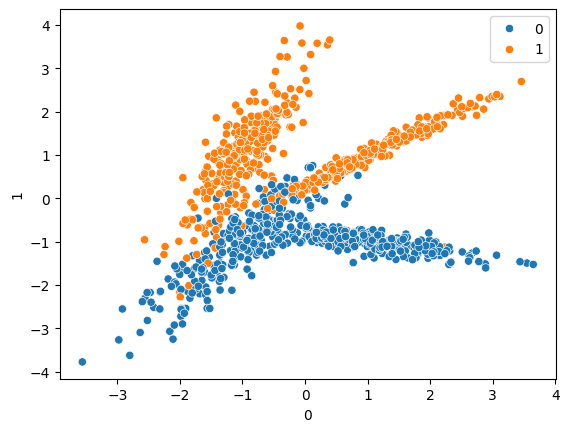

In [6]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [8]:
from sklearn.svm import SVC


In [9]:
svc=SVC(kernel='linear')


In [10]:
svc.fit(X_train,y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [11]:
svc.coef_


array([[-1.2107184,  2.8843681]])

In [12]:
y_pred = svc.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix


In [14]:

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       126
           1       0.91      0.91      0.91       124

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[115  11]
 [ 11 113]]


In [15]:
rbf=SVC(kernel='rbf')


In [16]:
rbf.fit(X_train,y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [17]:

## Prediction
y_pred1=rbf.predict(X_test)

In [18]:

print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       126
           1       0.92      0.90      0.91       124

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[116  10]
 [ 12 112]]


In [19]:

polynomial=SVC(kernel='poly')
polynomial.fit(X_train,y_train)
## Prediction
y_pred2=polynomial.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       126
           1       0.94      0.80      0.86       124

    accuracy                           0.88       250
   macro avg       0.89      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[120   6]
 [ 25  99]]


In [20]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
## Prediction
y_pred3=sigmoid.predict(X_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       126
           1       0.88      0.82      0.85       124

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250

[[112  14]
 [ 22 102]]


## Hyperparametere Tuning With SVC


In [21]:

from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [22]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)


In [23]:
grid.fit(X_train,y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1000


In [24]:
grid.best_params_


{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [25]:

## Prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       126
           1       0.92      0.91      0.91       124

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[116  10]
 [ 11 113]]
